### Downloading the data

In [99]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [100]:
from urllib.request import urlretrieve

In [101]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7fb14d087fa0>)

### Basic analysis

In [102]:
import pandas as pd

In [103]:
medical_df = pd.read_csv('medical.csv')

In [104]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [105]:
# Get the information about the dataset
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [106]:
# Statistics about the data
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### EDA

In [107]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

The following settings will improve the default style and font sizes for our charts

In [108]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [109]:
# Age -- analysis
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [110]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')

fig.update_layout(bargap=0.1)
fig.show()

above graph shows a uniform distribution -- what is uniform distribution?

In [111]:
# BMI - anlysis

fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI')

fig.update_layout(bargap=0.1)
fig.show()

the above graph is a normal/gaussian distribution -- what is gaussian distribution?

In [112]:
# charges -- analysis
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],
                   title='Annual Medical Charges')

fig.update_layout(bargap=0.1)
fig.show()

In [113]:
#smoker -- analysis
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [114]:
px.histogram(medical_df,x='smoker', color='sex', title='Smoker')

In [115]:
px.histogram(medical_df,x='smoker', color='region', title='Smoker')

In [116]:
px.histogram(medical_df,x='smoker', color='children', title='Smoker')

### Age and Charges

In [117]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs Charges')

fig.update_traces(marker_size=5)
fig.show()

### BMI and Charges

In [118]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs Charges')

fig.update_traces(marker_size=5)
fig.show()

In [119]:
px.violin(medical_df,x='children',y='charges')

In [120]:
px.violin(medical_df,x='sex',y='charges')

In [121]:
px.violin(medical_df,x='region',y='charges')

In [122]:
px.violin(medical_df,x='smoker',y='charges',color='smoker')

### Correlation

In [123]:
medical_df['charges'].corr(medical_df['age'])

0.2990081933306477

In [124]:
medical_df['charges'].corr(medical_df['bmi'])

0.19834096883362887

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [125]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df['smoker'].map(smoker_values)
medical_df['charges'].corr(smoker_numeric)

0.7872514304984773

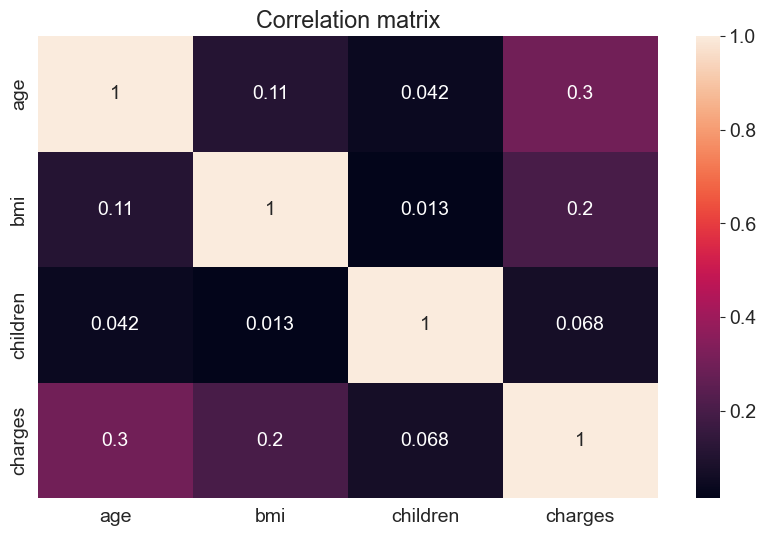

In [126]:
sns.heatmap(medical_df.corr(),annot=True)
plt.title('Correlation matrix');

# Linear regression using Single Feature

In [127]:
# non-smoker
non_smoker_df = medical_df[medical_df['smoker']=='no']

Next, let's visualize the relationship between 'age' and 'charges'

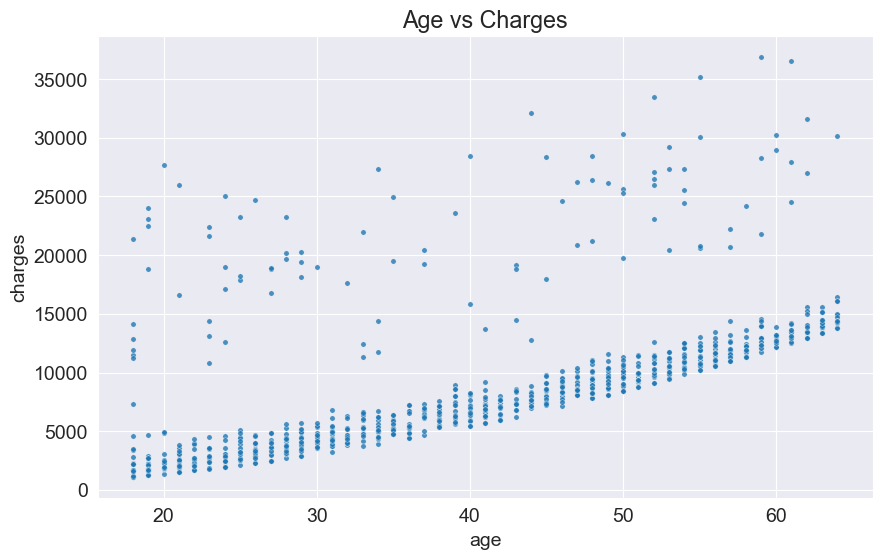

In [128]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x= 'age', y='charges', alpha=0.8,s=15);

In [129]:
def estimate_charges(age, w, b):
    return age * w + b

In [130]:
w = 50
b = 100

In [131]:
ages = non_smoker_df['age']
estimated_charges = estimate_charges(ages,w,b)

In [132]:
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [133]:
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

Text(0, 0.5, 'Estimated charges')

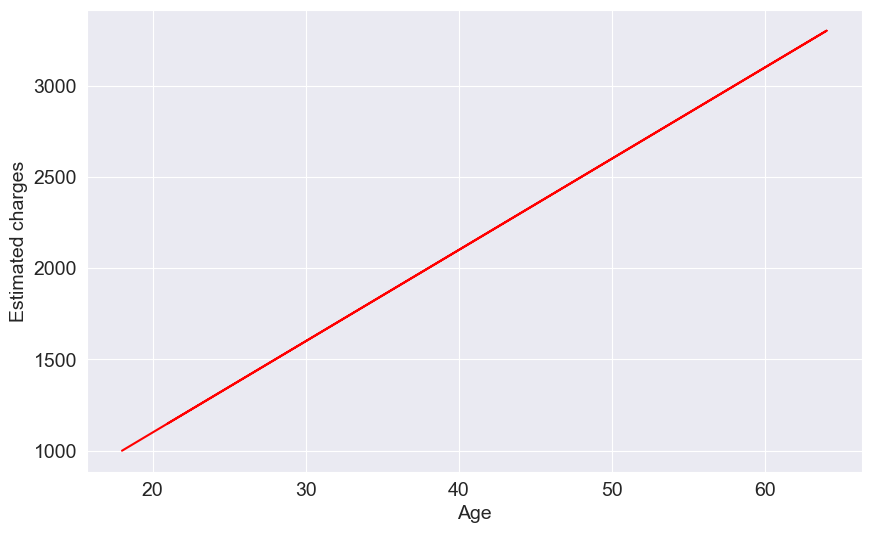

In [134]:
plt.plot(ages,estimated_charges,'r-');
plt.xlabel('Age')
plt.ylabel('Estimated charges')

We can overlay this line on the actual data, to see how well our model fits the data

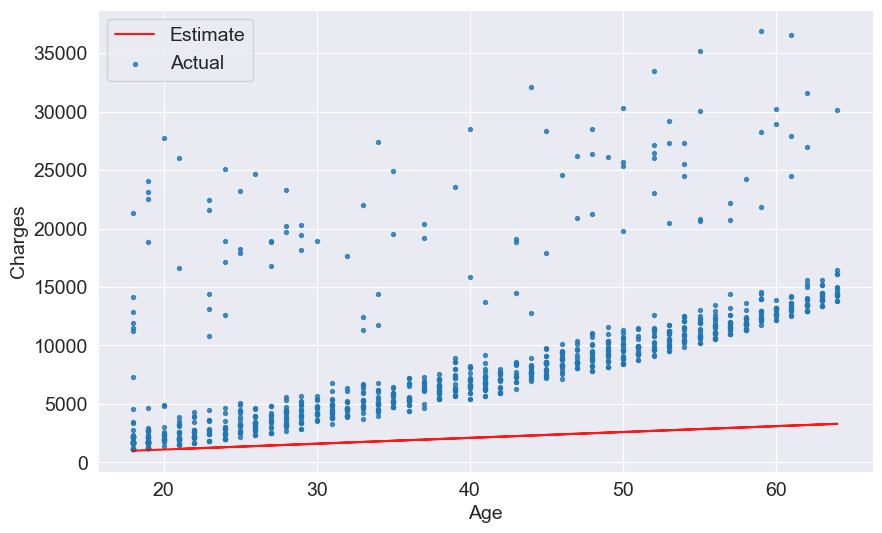

In [135]:
target = non_smoker_df['charges']

plt.plot(ages,estimated_charges,'r',alpha=0.9);
plt.scatter(ages,target,s=8,alpha=0.8);
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual']);

In [136]:
def try_parameter(w,b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']

    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages,estimated_charges,'r',alpha=0.9);
    plt.scatter(ages,target,s=8,alpha=0.8);
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual']);

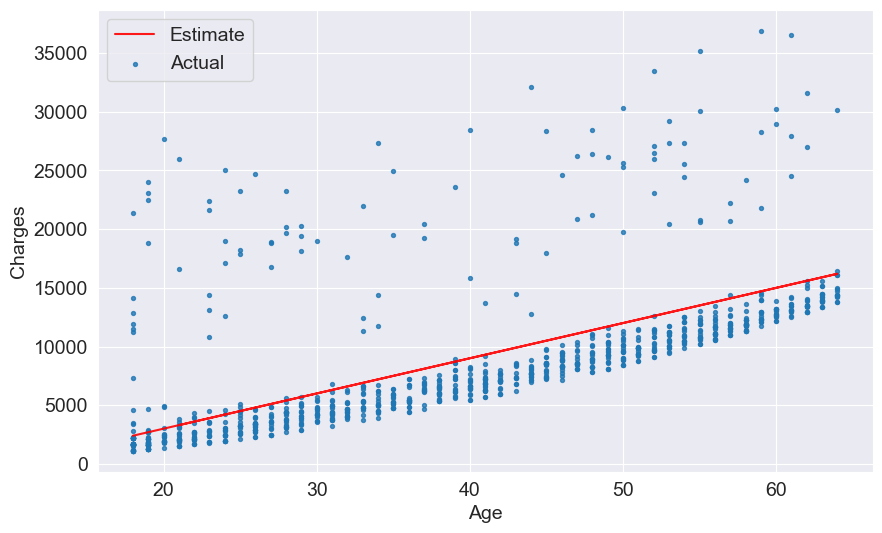

In [137]:
try_parameter(w=300,b=-3000)

### Loss/Cost Function

In [138]:
import numpy as np

In [139]:
def rmse(targets, predications):
    return np.sqrt(np.mean(np.square(targets - predications)))

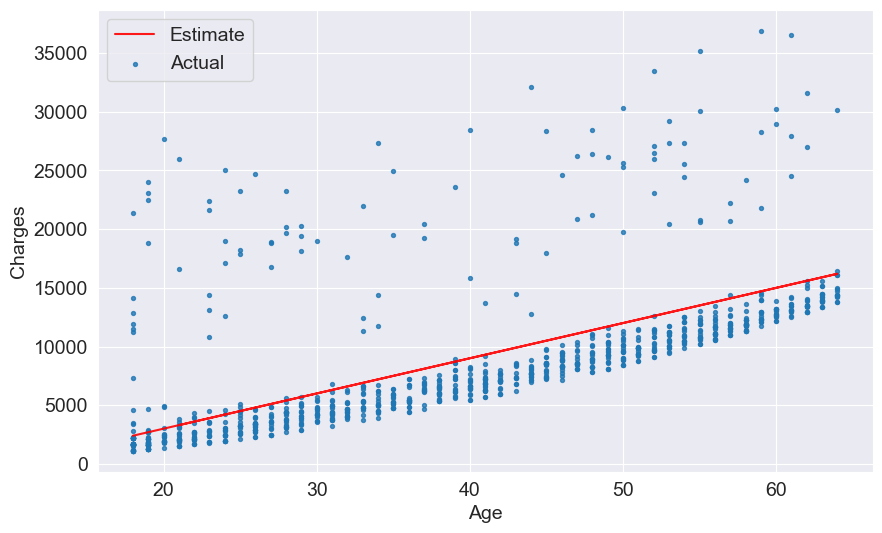

In [140]:
try_parameter(w=300,b=-3000)

In [141]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df['age'],w=300,b=-3000)

In [142]:
rmse(targets,predicted)

4700.736524304105

In [143]:
def try_parameter2(w,b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']

    estimated_charges = estimate_charges(ages,w,b)
    print(f'rmse value is {rmse(target,estimated_charges)} ')
    plt.plot(ages,estimated_charges,'r',alpha=0.9);
    plt.scatter(ages,target,s=8,alpha=0.8);
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual']);

rmse value is 4673.50882197076 


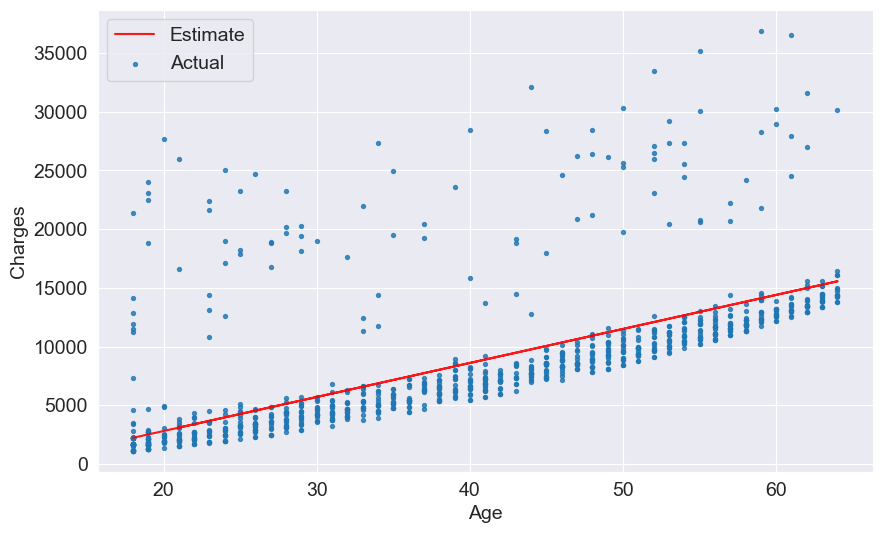

In [144]:
# try to fit a good value of w and b
try_parameter2(w=290,b=-3000)

rmse value is 8072.902425805632 


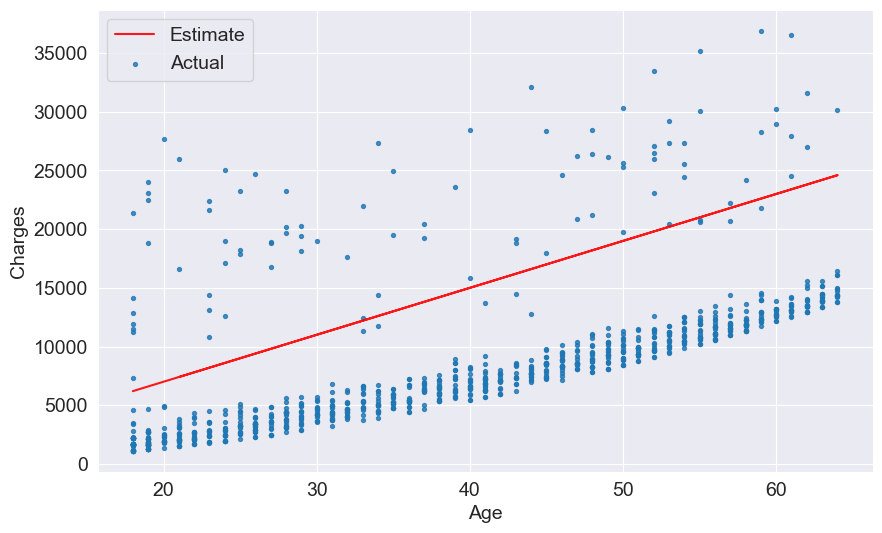

In [145]:
# if we put bad value of w and b
try_parameter2(w=400,b=-1000)

From the above two graph we can conclude that the less the value of rmse the close will be line to the data points.

### Linear Regression using scikit-learn

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
model = LinearRegression()

In [148]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [149]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
print('inputs.shape : ', inputs.shape)
print('targets.shape : ',targets.shape)

inputs.shape :  (1064, 1)
targets.shape :  (1064,)


Let's fit the model to the data.

In [150]:
model.fit(inputs, targets)

LinearRegression()

In [151]:
model.predict(np.array([[23],[18],[47]]))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  2719.0598744 , 10469.2783465 ])

In [152]:
predictions = model.predict(inputs)

In [153]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [154]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Let's compute the RMSE loss to evaluate the model.

In [155]:
rmse(targets,predictions)

4662.50576663639

In [156]:
#W
model.coef_

array([267.24891283])

In [157]:
#b
model.intercept_

-2091.420556565088

rmse value is 4662.50576663639 


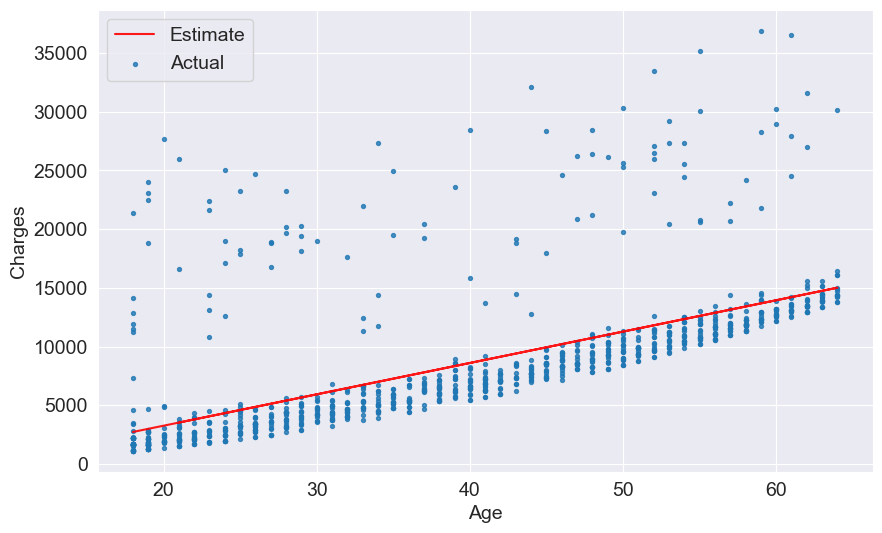

In [158]:
try_parameter2(w = model.coef_,b = model.intercept_)

Let's use another algorithm to train our model -- SGDReggressor

In [159]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(inputs, targets)

SGDRegressor()

In [160]:
model.predict(np.array([[23],[18],[47]]))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([4549.82910369, 3498.93657296, 9594.11325116])

In [161]:
predictions = model.predict(inputs)

In [162]:
predictions

array([3498.93657296, 5600.72163441, 6651.61416514, ..., 3498.93657296,
       3498.93657296, 4129.4720914 ])

In [163]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [164]:
# w
model.coef_

array([210.17850614])

In [165]:
#b
model.intercept_

array([-284.27653764])

rmse value is 4773.718558724358 


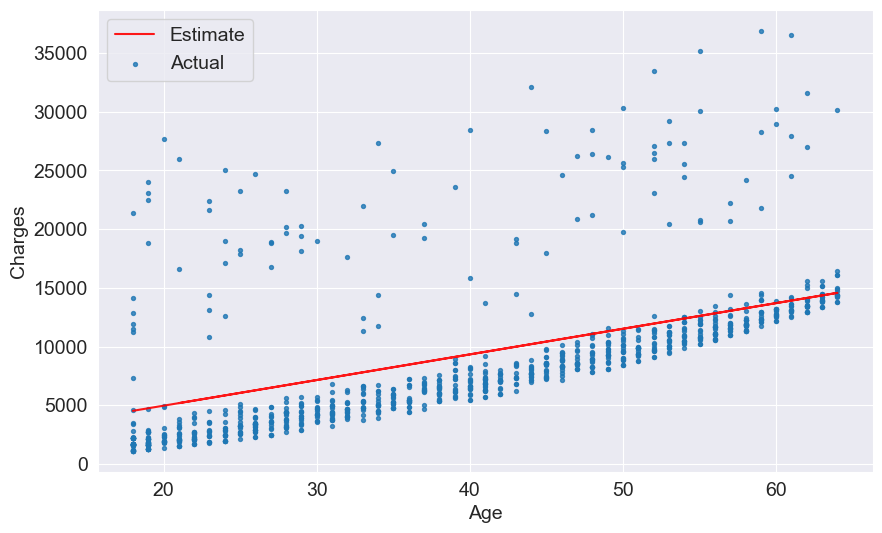

In [166]:
try_parameter2(w=218.52649014,b=588.46962343)

This tells that the Linear Reggression algorithm is performing better than SGDReggressor

--------------------

**Exercise:** Repeat the steps in this section to train a linear reggression model to estimate medical charges for smokers.Visualize the targets and predictions and compute the loss.

In [167]:
# non-smokers
smokers_df = medical_df[medical_df['smoker']=='yes']
smokers_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [168]:
inputs = smokers_df[['age']]
targets = smokers_df['charges']
print('inputs.shape : ', inputs.shape)
print('targets.shape : ',targets.shape)

inputs.shape :  (274, 1)
targets.shape :  (274,)


In [169]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [170]:
inputs

,age
0,19
11,62
14,27
19,30
23,34
...,...
1313,19
1314,30
1321,62
1323,42


In [171]:
targets

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [172]:
model.fit(inputs,targets)

LinearRegression()

In [173]:
predictions = model.predict(inputs)

In [174]:
predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [175]:
#w
model.coef_

array([305.23760211])

In [176]:
#b
model.intercept_

20294.128126915974

In [177]:
def try_parameter_smoker(w,b):
    ages = smokers_df['age']
    target = smokers_df['charges']

    estimated_charges = estimate_charges(ages,w,b)
    print(f'rmse value is {rmse(target,estimated_charges)} ')
    plt.plot(ages,estimated_charges,'r',alpha=0.9);
    plt.scatter(ages,target,s=8,alpha=0.8);
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual']);

rmse value is 10711.003348102411 


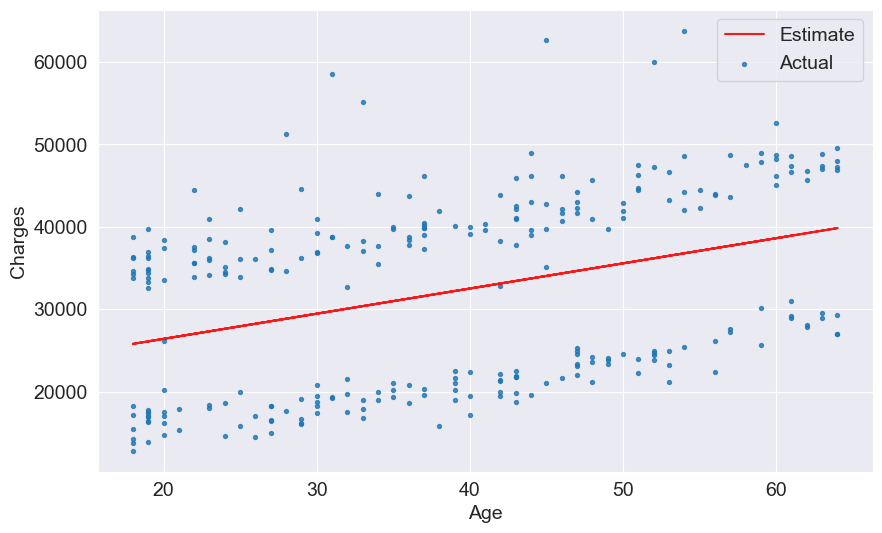

In [178]:
try_parameter_smoker(w=305.23760211,b=20294.128126915974)

### Machine Learning
Congratulations, you've just trained your ```first machine learning model!!```

Every machine learning problem has three components:
1. Model
2. Cost Function
3. Optimizer

### Linear Regression using multiple Features

In [179]:
# non-smokers

# Create inputs and targets
inputs, targets = non_smoker_df[['age','bmi','children']],non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss : ',loss)

Loss :  4608.470405038245


In [180]:
model.coef_, model.intercept_

(array([265.2938443 ,   5.27956313, 580.65965053]), -2809.2976032235965)

In [181]:
# smokers

# Create inputs and targets
inputs, targets = smokers_df[['age','bmi','children']],smokers_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss : ',loss)

Loss :  5718.2024805241535


In [182]:
model.coef_,model.intercept_

(array([ 264.93316919, 1438.72926245,  198.88027911]), -22556.088196491608)

### Using Categorical Features for machine learning

In [184]:
medical_df['smoker_code'] = medical_df['smoker'].map(smoker_values)

In [185]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [186]:
# very high correlation
medical_df['charges'].corr(medical_df['smoker_code'])

0.7872514304984773

In [188]:
# applying algorithm on whole dataset

# Create inputs and targets
inputs, targets = medical_df[['age','bmi','children','smoker_code']],medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss : ',loss)

Loss :  6056.439217188077


In [189]:
sex_codes = {'female':0,'male':1}
medical_df['sex_code'] = medical_df['sex'].map(sex_codes)

In [190]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [191]:
# applying algorithm on whole dataset

# Create inputs and targets
inputs, targets = medical_df[['age','bmi','children','smoker_code','sex_code']],medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss : ',loss)

Loss :  6056.1007087545395


#### One-hot encoding

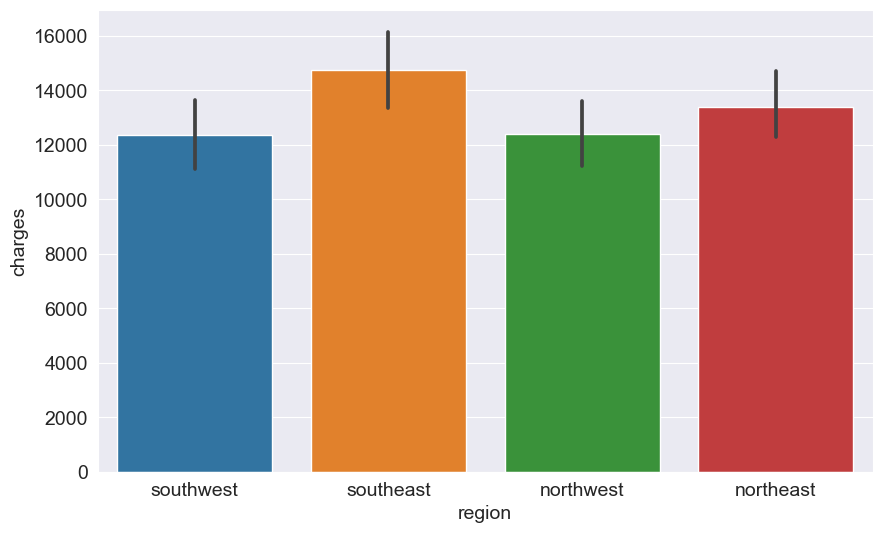

In [193]:
sns.barplot(data=medical_df,x='region',y='charges');

In [195]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
onehot = enc.fit_transform(medical_df[['region']]).toarray()

In [197]:
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [196]:
onehot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [200]:
medical_df[['northeast','northwest','southeast','southwest']] = onehot.astype(int)

In [201]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,0,1


In [202]:
# applying algorithm on whole dataset

# Create inputs and targets
inputs, targets = medical_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']],medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss : ',loss)

Loss :  6041.679651174454


In [203]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [204]:
model.intercept_

-12525.547811195447

#### Report

 - we should make two different model i.e, one for smoker and another for non-smoker.<br>
```REASON :- ```even we haven't used one-hot encoding on the smoker and non-smoker model even then there root mean squared error(RMSE) is less than making a model on complete data.